# Importar dependências instaladas no ambiente virtual

In [ ]:
%pip install scikit-learn

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.dataframes import data_AVC, df
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregar dataset

In [24]:
# Convert categorical variables to one-hot encoding
data_AVC = pd.get_dummies(data_AVC, columns=[
                      'gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'])

# Display basic information about the dataset
print(data_AVC.info())

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 162 to 188
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   age                             249 non-null    int64  
 2   hypertension                    249 non-null    int64  
 3   heart_disease                   249 non-null    int64  
 4   avg_glucose_level               249 non-null    float64
 5   bmi                             209 non-null    float64
 6   stroke                          249 non-null    int64  
 7   gender_Female                   249 non-null    bool   
 8   gender_Male                     249 non-null    bool   
 9   ever_married_No                 249 non-null    bool   
 10  ever_married_Yes                249 non-null    bool   
 11  work_type_Govt_job              249 non-null    bool   
 12  work_type_Private               249 non

# Cálculo de assimetrua e curtose

In [25]:
# Calculate skewness and kurtosis for numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data_AVC[numerical_vars].apply(skew)
kurtosis_value = data_AVC[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)


Skewness:
age                 -1.35
avg_glucose_level    0.55
bmi                   NaN
dtype: float64

Kurtosis:
age                  3.06
avg_glucose_level   -1.22
bmi                   NaN
dtype: float64


# Análise de variáveis que mais se relacionam com a variável principal: infarto

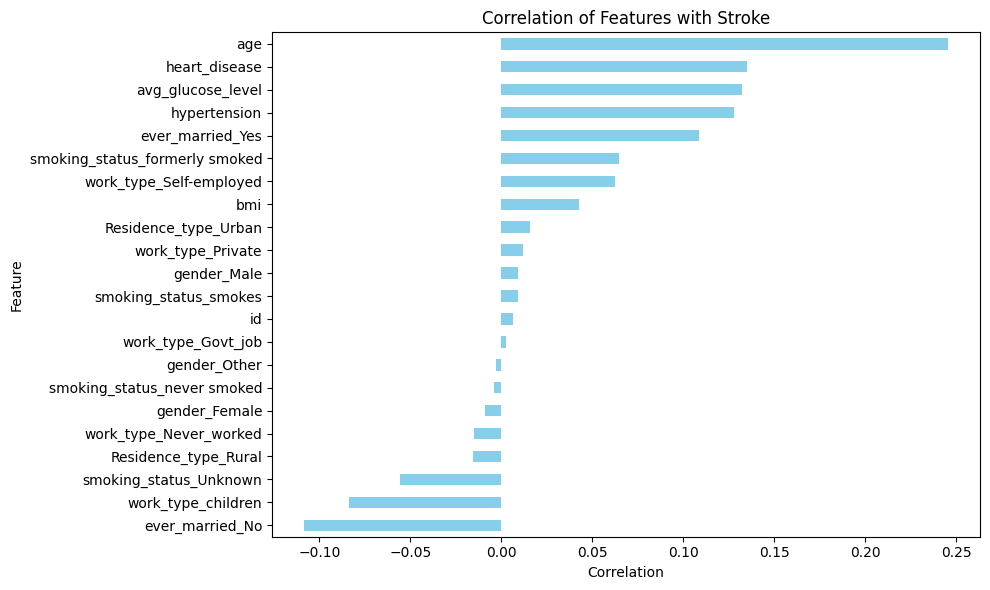

In [27]:
# Load the dataset
data = pd.read_csv('./src/data.csv')
data = data.drop(columns=['id'])
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# # Display basic information about the dataset
# print(data.info())

# # Calculate skewness and kurtosis for numerical variables
# numerical_vars = ['age', 'avg_glucose_level', 'bmi']
# skewness = data[numerical_vars].apply(skew)
# kurtosis_value = data[numerical_vars].apply(kurtosis)

# print("\nSkewness:")
# print(skewness)
# print("\nKurtosis:")
# print(kurtosis_value)

# Compute the correlation matrix
correlation_matrix = data.corr()

stroke_correlation = data.corr()['stroke'].drop(
    'stroke')  # Drop correlation of 'stroke' with itself

# Plot the correlations
plt.figure(figsize=(10, 6))
stroke_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout
plt.show()

## Correlacao com pessoas de ate 35 anos


In [28]:
data = pd.read_csv('./src/data.csv')
data = data.drop(columns=['id'])
data_jovem = data.query('age <= 35')


data_jovem = pd.get_dummies(data_jovem, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


print(data_jovem.info())


numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data_jovem[numerical_vars].apply(skew)
kurtosis_value = data_jovem[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)


correlation_matrix = data_jovem.corr()

stroke_correlation = data_jovem.corr()['stroke'].drop(
    'stroke')


plt.figure(figsize=(10, 6))
stroke_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show() 

KeyError: "None of [Index(['gender', 'ever_married', 'work_type', 'Residence_type',\n       'smoking_status'],\n      dtype='object')] are in the [columns]"